In [ ]:
#Dependencies #Cielo
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Importing files
agr = 'GitHub_Lau/Resources/API_NV.AGR.TOTL.KD_DS2_es_csv_v2_4363686.csv'
agr_df = pd.read_csv(agr, skiprows=3)
agr_pib = 'GitHub_Lau/Resources/API_NV.AGR.TOTL.ZS_DS2_es_csv_v2_4350941.csv'
agr_pib_df = pd.read_csv(agr_pib, skiprows=3)

## Agriculture Value Added (US$ at constant 2010 prices)

In [ ]:
agr_df.head(3)

Country Name Country Code  \
0        Aruba          ABW   
1          NaN          AFE   
2   Afganistán          AFG   

                                      Indicator Name  Indicator Code  1960  \
0  Agricultura, valor agregado (US$ a precios con...  NV.AGR.TOTL.KD   NaN   
1  Agricultura, valor agregado (US$ a precios con...  NV.AGR.TOTL.KD   NaN   
2  Agricultura, valor agregado (US$ a precios con...  NV.AGR.TOTL.KD   NaN   

   1961  1962  1963  1964  1965  ...          2013          2014  \
0   NaN   NaN   NaN   NaN   NaN  ...           NaN           NaN   
1   NaN   NaN   NaN   NaN   NaN  ...  1.150614e+11  1.210840e+11   
2   NaN   NaN   NaN   NaN   NaN  ...  4.189186e+09  4.184968e+09   

           2015          2016          2017          2018          2019  \
0           NaN           NaN           NaN           NaN           NaN   
1  1.253312e+11  1.285914e+11  1.335113e+11  1.363151e+11  1.382294e+11   
2  3.948215e+09  4.183993e+09  4.452231e+09  4.255651e+09  4.998680e+09   

           2020          2021  Unnamed: 66  
0           NaN           NaN          NaN  
1  1.426608e+11  1.490749e+11          NaN  
2  5.295719e+09           NaN          NaN  

[3 rows x 67 columns]

In [ ]:
# Transforming year columns to Year as column and validating by viewing the first 3 rows
agr_df = agr_df.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
                    var_name='Year', value_name= "Value added (US$ at constant 2010 prices)")
agr_df.head(3)

Country Name Country Code  \
0        Aruba          ABW   
1          NaN          AFE   
2   Afganistán          AFG   

                                      Indicator Name  Indicator Code  Year  \
0  Agricultura, valor agregado (US$ a precios con...  NV.AGR.TOTL.KD  1960   
1  Agricultura, valor agregado (US$ a precios con...  NV.AGR.TOTL.KD  1960   
2  Agricultura, valor agregado (US$ a precios con...  NV.AGR.TOTL.KD  1960   

   Value added (US$ at constant 2010 prices)  
0                                        NaN  
1                                        NaN  
2                                        NaN

In [ ]:
#Dropping columns that are not required
agr_df_c = agr_df.drop(['Indicator Name', 'Indicator Code'], axis=1)
agr_df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16758 entries, 0 to 16757
Data columns (total 4 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country Name                               16632 non-null  object 
 1   Country Code                               16758 non-null  object 
 2   Year                                       16758 non-null  object 
 3   Value added (US$ at constant 2010 prices)  9579 non-null   float64
dtypes: float64(1), object(3)
memory usage: 523.8+ KB


In [ ]:
# Filtering for Year between 1970 and 2020
agr_df_c = agr_df_c[(agr_df_c['Year']>= '1970') & (agr_df_c['Year'] <= '2020')]

In [ ]:
# Modifying Year type from string to int
agr_df_c = agr_df_c.astype({'Year': 'int64'})
agr_df_c.dtypes

Country Name                                  object
Country Code                                  object
Year                                           int64
Value added (US$ at constant 2010 prices)    float64
dtype: object

In [ ]:
agr_df_c.isna().sum()

Country Name                                  102
Country Code                                    0
Year                                            0
Value added (US$ at constant 2010 prices)    4728
dtype: int64

In [ ]:
# List of entity names with missing Code
missing_country_nm = agr_df_c[agr_df_c['Country Name'].isna()]
#missing_country_nm
list_missing = missing_country_nm['Country Code'].unique().tolist()
list_missing
# AFE and AFW will be dropped since it is a cluster of countries and we are using only countries
# AFE = Africa Eastern and Southern
# AFW = Africa Western and Central

['AFE', 'AFW']

In [ ]:
# Removing rows with null in Country Name that represent AFE and AFW
agr_df_c = agr_df_c.dropna(subset=['Country Name'])
agr_df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13464 entries, 2660 to 16225
Data columns (total 4 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country Name                               13464 non-null  object 
 1   Country Code                               13464 non-null  object 
 2   Year                                       13464 non-null  int64  
 3   Value added (US$ at constant 2010 prices)  8758 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 525.9+ KB


In [ ]:
# DF of missing values for Country Name and Country Code
missing_value_agr = agr_df_c[agr_df_c["Value added (US$ at constant 2010 prices)"].isna()]
missing_value_agr.nunique()
# missing_value_name_code = missing_value[['Country Name', 'Country Code']]
# missing_value_name_code = missing_value_name_code.drop_duplicates()
# missing_value_name_code.to_dict('records')

Country Name                                 179
Country Code                                 179
Year                                          51
Value added (US$ at constant 2010 prices)      0
dtype: int64

## Agriculture Value Added (% of GDP)

In [ ]:
agr_pib_df.head(3)

Country Name Country Code                           Indicator Name  \
0        Aruba          ABW  Agricultura, valor agregado (% del PIB)   
1          NaN          AFE  Agricultura, valor agregado (% del PIB)   
2   Afganistán          AFG  Agricultura, valor agregado (% del PIB)   

   Indicator Code  1960  1961  1962  1963  1964  1965  ...       2013  \
0  NV.AGR.TOTL.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...        NaN   
1  NV.AGR.TOTL.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...  11.593275   
2  NV.AGR.TOTL.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...  22.810663   

        2014       2015       2016       2017       2018       2019  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1  12.522407  13.560281  13.720887  13.441330  12.086055  12.708430   
2  22.137041  20.634323  25.740314  26.420199  22.042897  25.773971   

        2020      2021  Unnamed: 66  
0        NaN       NaN          NaN  
1  14.660148  13.28224          NaN  
2  26.820600       NaN          NaN  

[3 rows x 67 columns]

In [ ]:
# Columns by year melted to one single Column
agr_pib_df = agr_pib_df.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
                    var_name='Year', value_name="Value added (% of GDP)")

In [ ]:
# Removing the two columns that are not required
agr_pib_df_c = agr_pib_df.drop(['Indicator Name', 'Indicator Code'], axis=1)
agr_pib_df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16758 entries, 0 to 16757
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country Name            16632 non-null  object 
 1   Country Code            16758 non-null  object 
 2   Year                    16758 non-null  object 
 3   Value added (% of GDP)  10277 non-null  float64
dtypes: float64(1), object(3)
memory usage: 523.8+ KB


In [ ]:
# Filtering for Year between 1970 and 2020
agr_pib_df_c = agr_pib_df_c[(agr_pib_df_c['Year']>= '1970') & (agr_pib_df_c['Year'] <= '2020')]
agr_pib_df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13566 entries, 2660 to 16225
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country Name            13464 non-null  object 
 1   Country Code            13566 non-null  object 
 2   Year                    13566 non-null  object 
 3   Value added (% of GDP)  9396 non-null   float64
dtypes: float64(1), object(3)
memory usage: 529.9+ KB


In [ ]:
# List of entity names with missing Code
missing_country_nm = agr_pib_df_c[agr_pib_df_c['Country Name'].isna()]
#missing_country_nm
list_missing = missing_country_nm['Country Code'].unique().tolist()
list_missing
# AFE and AFW will be dropped since it is a cluster of countries and we are using only countries
# AFE = Africa Eastern and Southern
# AFW = Africa Western and Central

['AFE', 'AFW']

In [ ]:
# Removing rows with null in Country Name that represent AFE and AFW
agr_pib_df_c = agr_pib_df_c.dropna(subset=['Country Name'])
agr_pib_df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13464 entries, 2660 to 16225
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country Name            13464 non-null  object 
 1   Country Code            13464 non-null  object 
 2   Year                    13464 non-null  object 
 3   Value added (% of GDP)  9316 non-null   float64
dtypes: float64(1), object(3)
memory usage: 525.9+ KB


In [ ]:
# Modifying Year type from string to int
agr_pib_df_c = agr_pib_df_c.astype({'Year': 'int64'})
agr_pib_df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13464 entries, 2660 to 16225
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country Name            13464 non-null  object 
 1   Country Code            13464 non-null  object 
 2   Year                    13464 non-null  int64  
 3   Value added (% of GDP)  9316 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 525.9+ KB


In [ ]:
# DF of missing values for Country Name and Country Code
missing_value_agr_pib = agr_pib_df_c[agr_pib_df_c["Value added (% of GDP)"].isna()]
missing_value_agr_pib.nunique()

Country Name              175
Country Code              175
Year                       51
Value added (% of GDP)      0
dtype: int64

### Joining both agriculture values

In [ ]:
# Outer join to include all rows from both tables
agr_c = agr_df_c.merge(agr_pib_df_c, on =['Country Name', 'Country Code', 'Year'], how= 'outer')
agr_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13464 entries, 0 to 13463
Data columns (total 5 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country Name                               13464 non-null  object 
 1   Country Code                               13464 non-null  object 
 2   Year                                       13464 non-null  int64  
 3   Value added (US$ at constant 2010 prices)  8758 non-null   float64
 4   Value added (% of GDP)                     9316 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 631.1+ KB


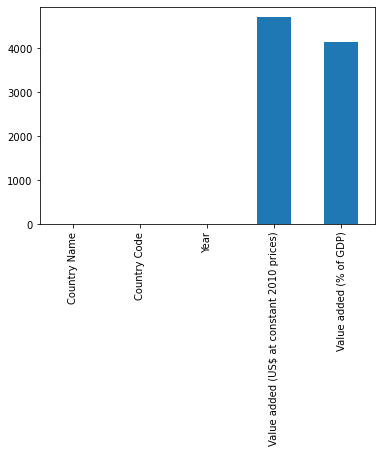

In [ ]:
agr_c.isna().sum().plot(kind='bar')
plt.show()

In [ ]:
agr_c.head(3)

Country Name Country Code  Year  Value added (US$ at constant 2010 prices)  \
0        Aruba          ABW  1970                                        NaN   
1   Afganistán          AFG  1970                                        NaN   
2       Angola          AGO  1970                                        NaN   

   Value added (% of GDP)  
0                     NaN  
1                     NaN  
2                     NaN

In [ ]:
#agr_c.to_csv('agriculture.csv')